In [1]:
# import datasets

import pandas as pd

cols = ['X', 'Y']
df_square = pd.read_csv('./Datasets/square.txt', sep=" ", names=cols, header=None)

c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'SSE')

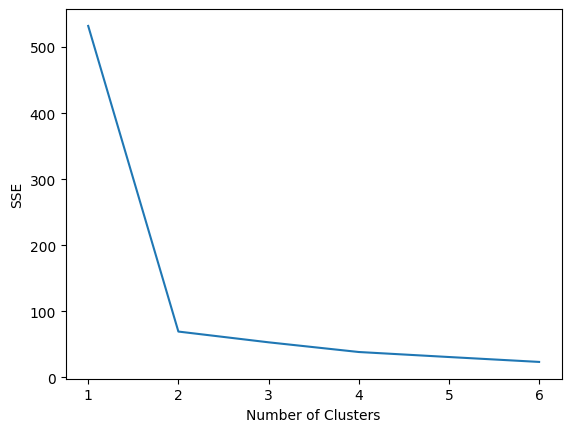

In [2]:
# estimate the number of clusters using a SSE vs. number of clusters graph

from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_square)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [3]:
# implement k-means clustering on square dataset with k=2

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(df_square) 
labels = k_means.labels_

c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
# get centroids of the square dataset

centroids = k_means.cluster_centers_

# assign a clusterto each data point

df_square['Cluster_ID'] = k_means.predict(df_square)

# map centroid coordinates to each data point

cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
df_square['Cen_X'] = df_square.Cluster_ID.map({0:cen_x[0], 1:cen_x[1]})
df_square['Cen_Y'] = df_square.Cluster_ID.map({0:cen_y[0], 1:cen_y[1]})

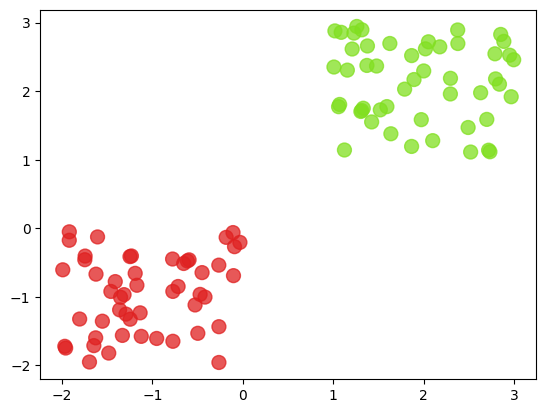

In [5]:
# map colors to each cluster

colors = ['#DF2020', '#81DF20']
df_square['Color'] = df_square.Cluster_ID.map({0:colors[0], 1:colors[1]})

# plot the clusters

plt.scatter(df_square.X, df_square.Y, c=df_square.Color, alpha = 0.75, s=100)